In [ ]:
#!pip install pandas seaborn statsmodels sklearn openpyxl xlrd geopandas pysal ppscore

In [3]:
# General
import pandas as pd
import os
import scripts
import importlib
import numpy as np
import warnings

# Machine Learnign
## Sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Statmodels
from statsmodels.tools import add_constant
import statsmodels.api as sm

## Others
import ppscore as pps
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

# Geo
import geopandas as gpd
import libpysal
import splot
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from pysal.model import spreg

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [50]:
importlib.reload(scripts)

<module 'scripts' from '/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/scripts.py'>

In [53]:
sns.set_theme()

In [83]:
import json

variables = json.load(open('variables.json', 'r'))

variables_sel = variables['mun_dez']

### Carregar Dados

In [4]:
df_jan = pd.read_csv('dataset/novo/municipio_jan vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_jan.head()

REGIAO  UF MUNICIPIO_DESCRICAO  Capital  IDHM_2010  \
MUNICIPIO_IBGE                                                         
1302603            Norte  AM              Manaus        1      0.625   
2507507         Nordeste  PB         João Pessoa        1      0.697   
2304400         Nordeste  CE           Fortaleza        1      0.670   
2927408         Nordeste  BA            Salvador        1      0.753   
2704302         Nordeste  AL              Maceió        1      0.640   

                Renda_2010  SaldoEmprego_01  Dens_Demográfica  \
MUNICIPIO_IBGE                                                  
1302603             762.54            878.0            158.06   
2507507             627.59             41.0           3421.30   
2304400             562.53            948.0           7786.52   
2927408             727.33           1113.0           3859.35   
2704302             401.42           -427.0           1854.12   

                Perc_EnsinoMedio_2010  Perc_EnsinoSuper_2010  Preco_jan_2020  \
MUNICIPIO_IBGE                                                                 
1302603                         49.86                  10.97     4611.637209   
2507507                         49.91                  18.61     4329.077250   
2304400                         45.93                  13.73     5744.260562   
2927408                         52.28                  14.59     5037.085869   
2704302                         41.83                  14.24     4831.409966   

                POPULAÇÃO ESTIMADA  SdoEmpresas_01  Contratacoes2020  
MUNICIPIO_IBGE                                                        
1302603                    2219580          4904.0         -2.970542  
2507507                     817511          2702.0          5.858631  
2304400                    2686612          6393.0          2.347699  
2927408                    2886698          6872.0          0.678999  
2704302                    1025360          2205.0          3.382282

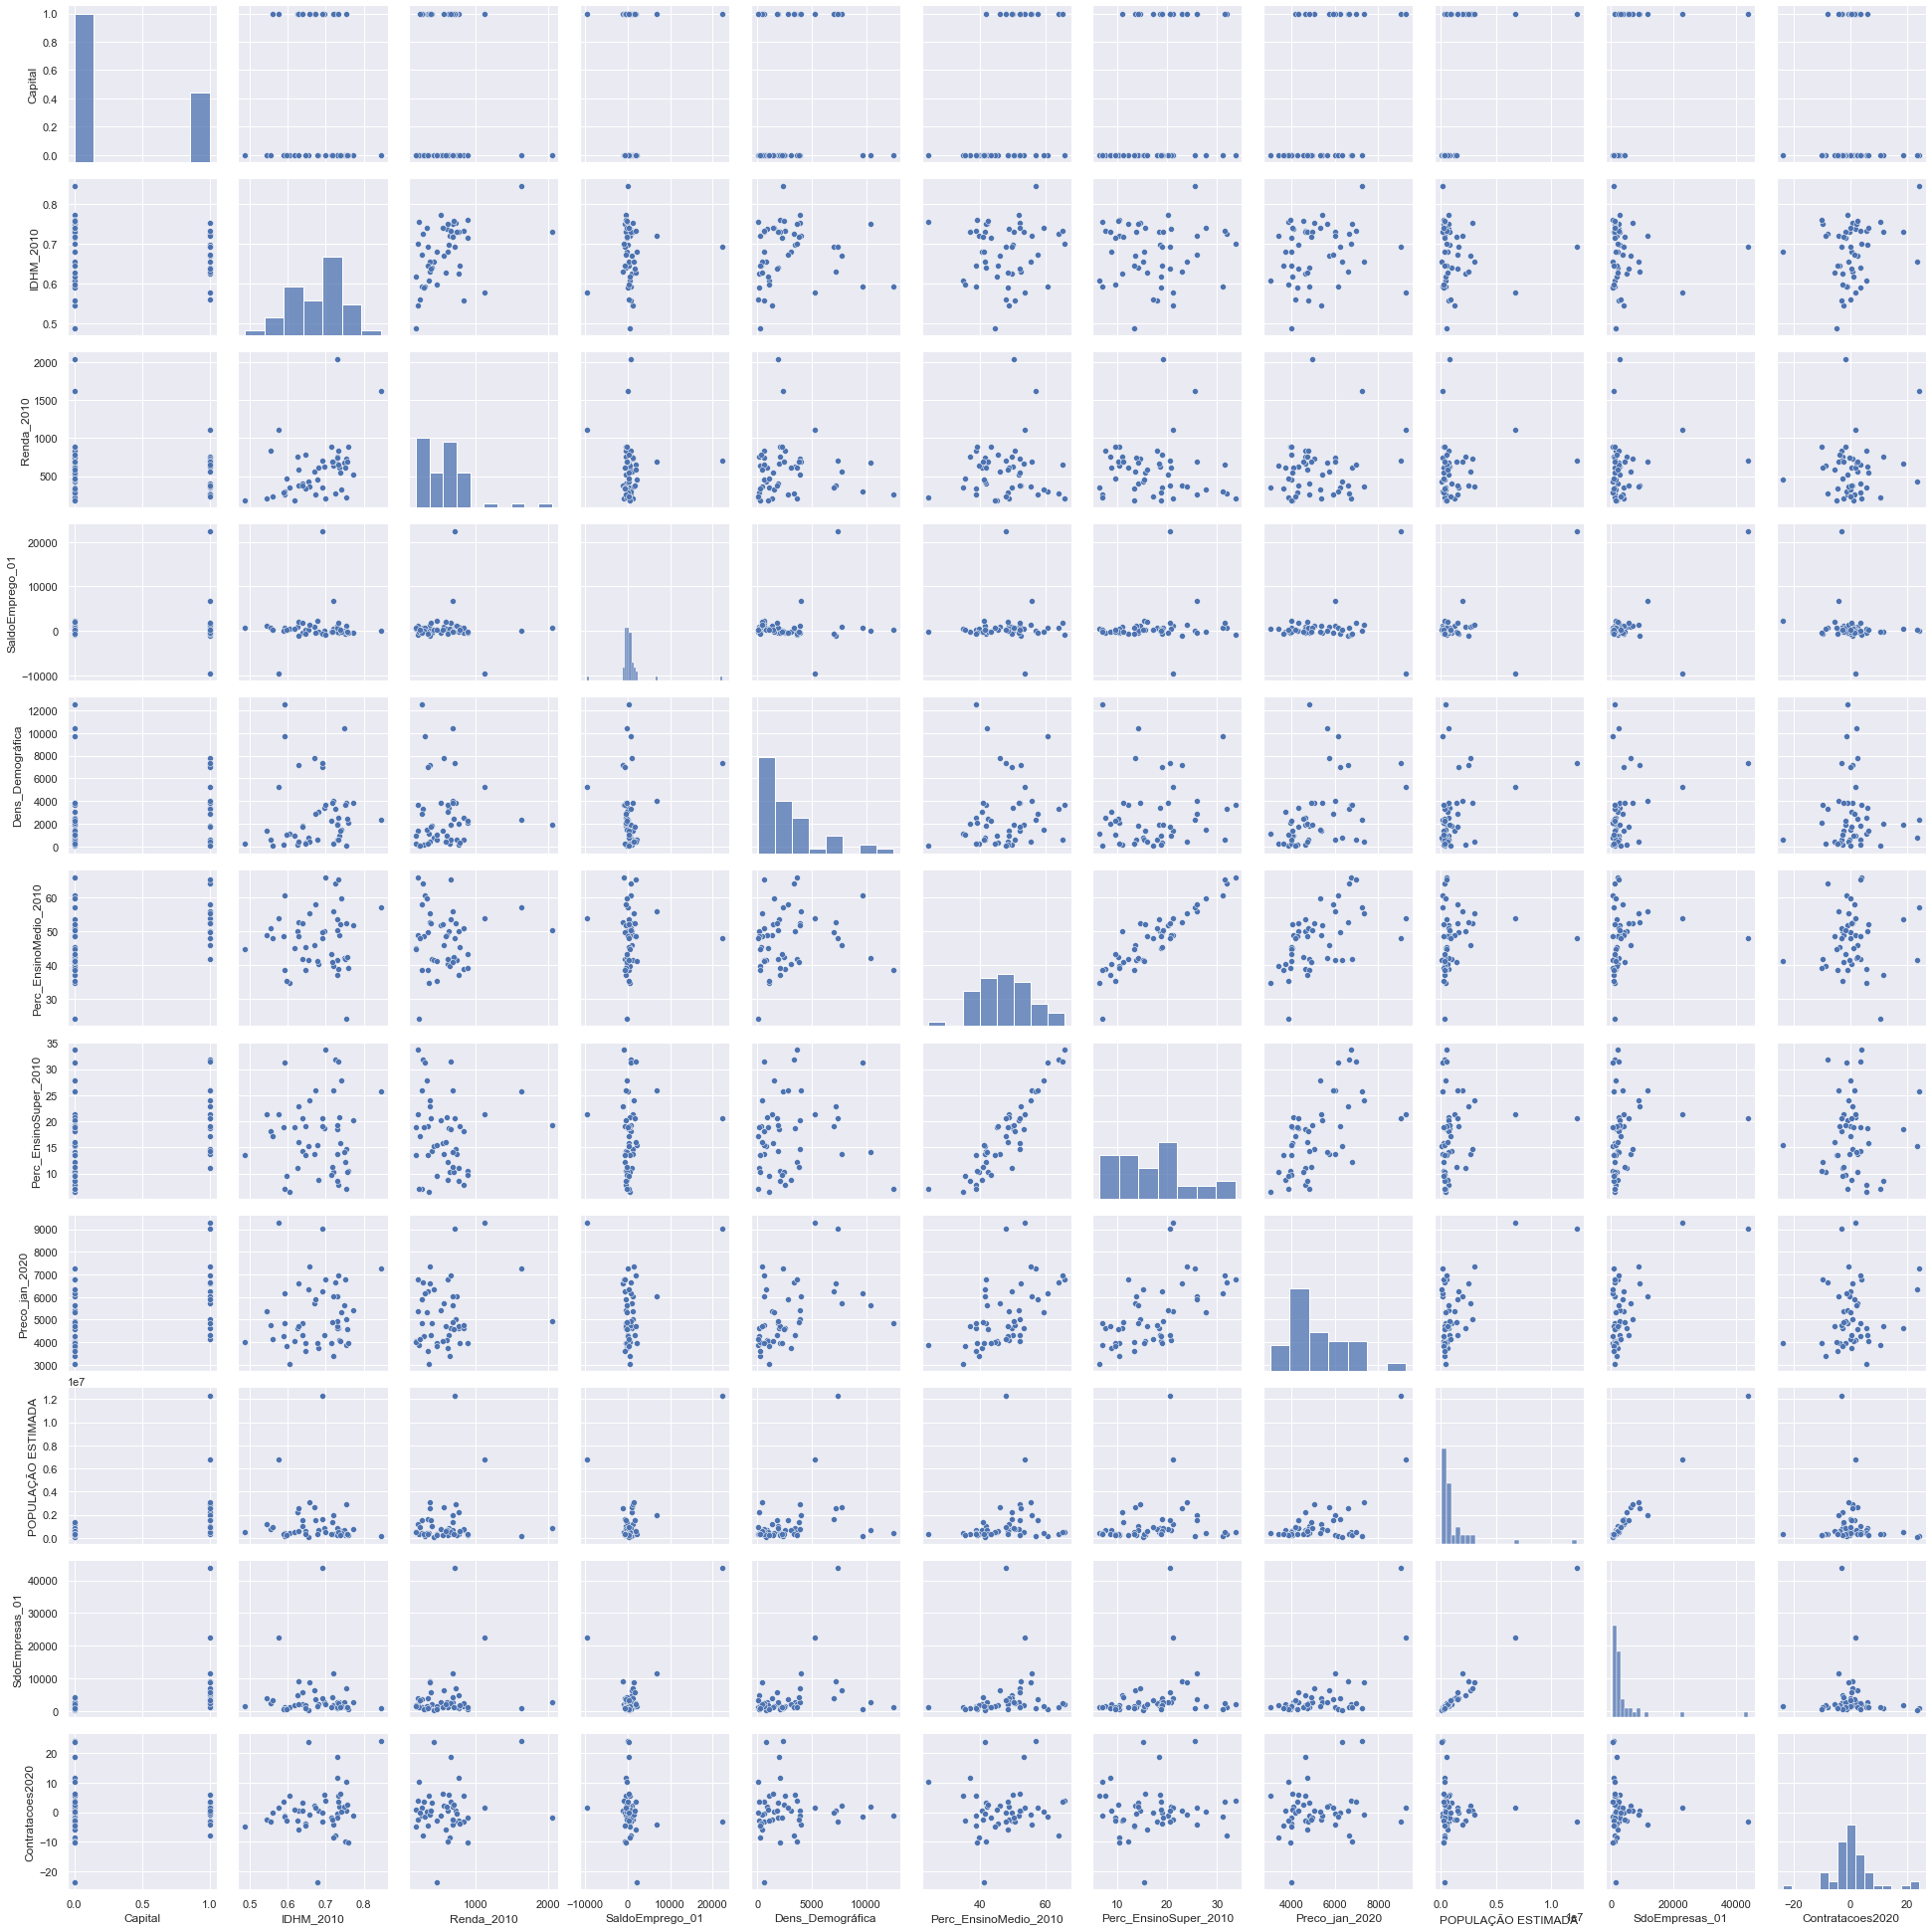

In [54]:
sns.pairplot(df_jan.iloc[:,3:])

plt.show()

In [5]:
df_dez = pd.read_csv('dataset/novo/municipio_dez vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_dez.head()

REGIAO  UF MUNICIPIO_DESCRICAO  Capital  IDHM_2010  \
MUNICIPIO_IBGE                                                         
1302603            Norte  AM              Manaus        1      0.625   
2507507         Nordeste  PB         João Pessoa        1      0.697   
2304400         Nordeste  CE           Fortaleza        1      0.670   
2927408         Nordeste  BA            Salvador        1      0.753   
2704302         Nordeste  AL              Maceió        1      0.640   

                Renda_2010  SaldoEmprego_12  Dens_Demográfica  \
MUNICIPIO_IBGE                                                  
1302603             762.54          -1451.0            158.06   
2507507             627.59           1553.0           3421.30   
2304400             562.53           1804.0           7786.52   
2927408             727.33            523.0           3859.35   
2704302             401.42            840.0           1854.12   

                casosAcumulado_12  Perc_EnsinoMedio_2010  \
MUNICIPIO_IBGE                                             
1302603                     82218                  49.86   
2507507                     41879                  49.91   
2304400                     81893                  45.93   
2927408                    109906                  52.28   
2704302                     36320                  41.83   

                Perc_EnsinoSuper_2010  Preco_dez_2020  POPULAÇÃO ESTIMADA  \
MUNICIPIO_IBGE                                                              
1302603                         10.97     5046.799519             2219580   
2507507                         18.61     4515.431694              817511   
2304400                         13.73     5947.932900             2686612   
2927408                         14.59     5210.399506             2886698   
2704302                         14.24     5194.891963             1025360   

                SdoEmpresas_12  Contratacoes2020  
MUNICIPIO_IBGE                                    
1302603                23234.0         -2.970542  
2507507                11219.0          5.858631  
2304400                29292.0          2.347699  
2927408                33003.0          0.678999  
2704302                10293.0          3.382282

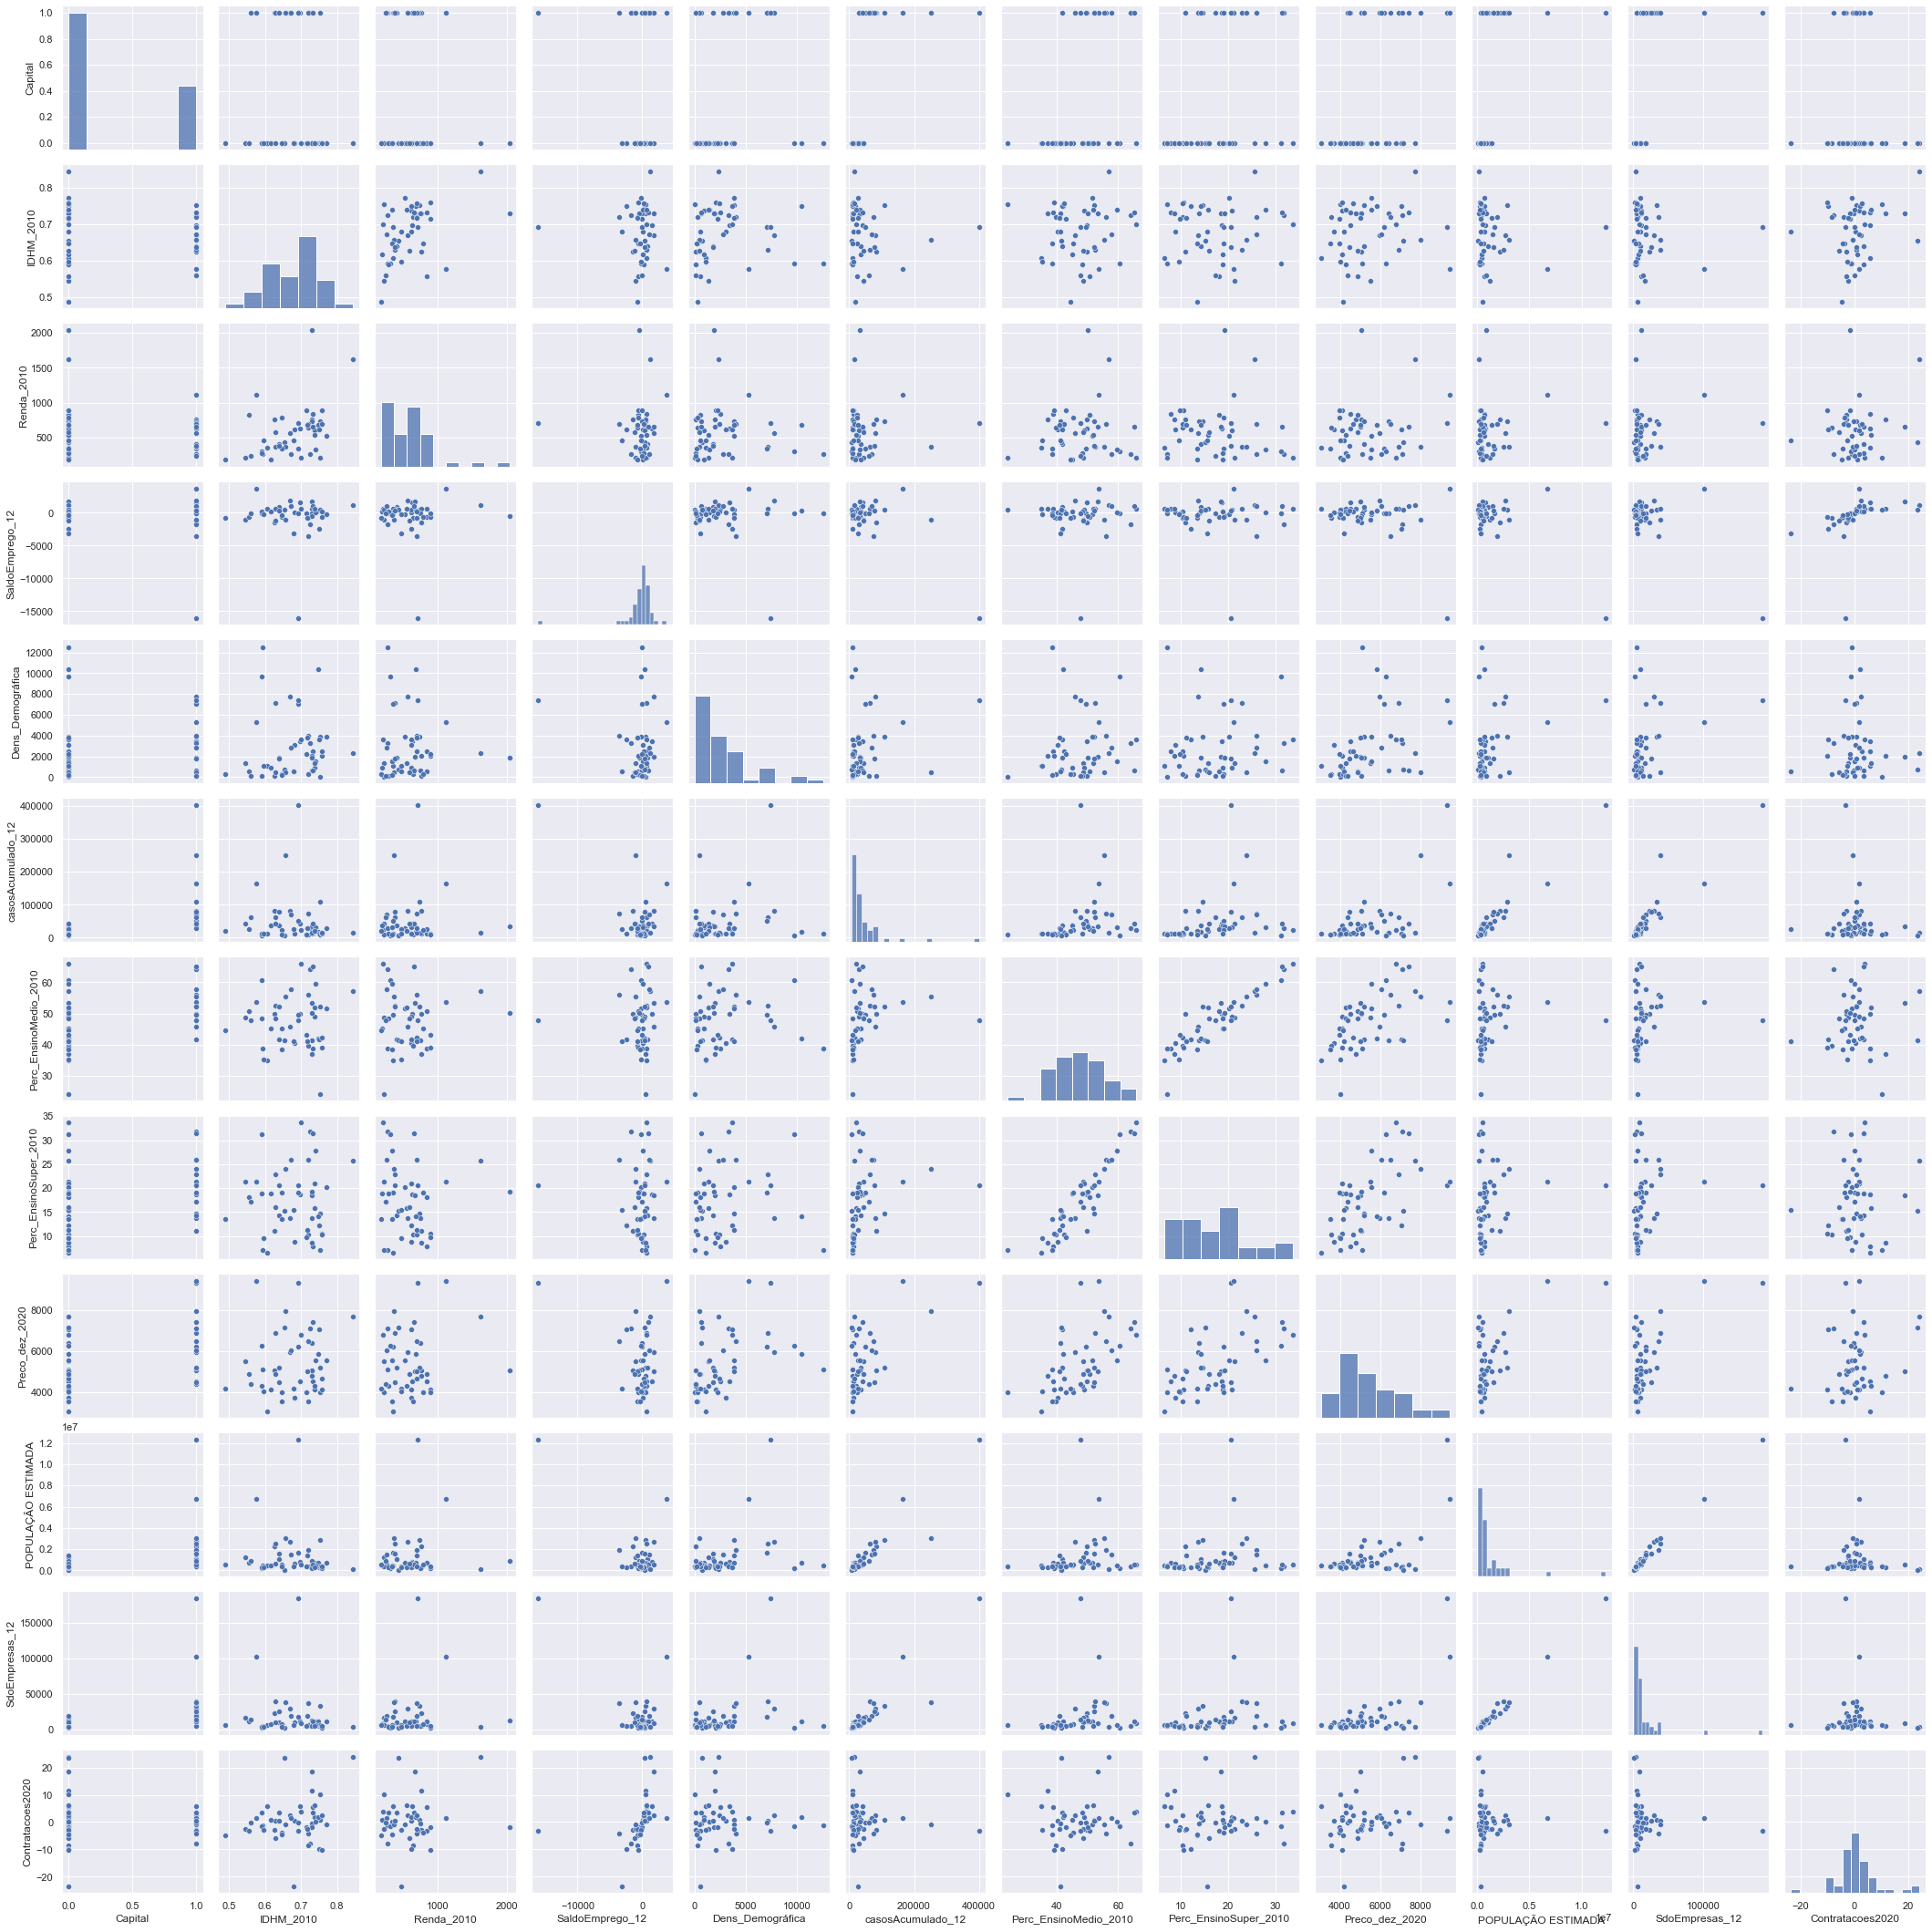

In [55]:
sns.pairplot(df_dez.iloc[:,3:])

plt.show()

In [6]:
df_var = pd.read_csv('dataset/novo/municipio_var vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_var.head()

REGIAO  UF MUNICIPIO_DESCRICAO  Capital  IDHM_2010  \
MUNICIPIO_IBGE                                                         
1302603            Norte  AM              Manaus        1      0.625   
2507507         Nordeste  PB         João Pessoa        1      0.697   
2304400         Nordeste  CE           Fortaleza        1      0.670   
2927408         Nordeste  BA            Salvador        1      0.753   
2704302         Nordeste  AL              Maceió        1      0.640   

                Renda_2010  Var_SaldoEmprego  Dens_Demográfica  \
MUNICIPIO_IBGE                                                   
1302603             762.54           -2329.0            158.06   
2507507             627.59            1512.0           3421.30   
2304400             562.53             856.0           7786.52   
2927408             727.33            -590.0           3859.35   
2704302             401.42            1267.0           1854.12   

                casosAcumulado_12  Perc_EnsinoMedio_2010  \
MUNICIPIO_IBGE                                             
1302603                     82218                  49.86   
2507507                     41879                  49.91   
2304400                     81893                  45.93   
2927408                    109906                  52.28   
2704302                     36320                  41.83   

                Perc_EnsinoSuper_2010  Variacao_preco  POPULAÇÃO ESTIMADA  \
MUNICIPIO_IBGE                                                              
1302603                         10.97      435.162310             2219580   
2507507                         18.61      186.354444              817511   
2304400                         13.73      203.672337             2686612   
2927408                         14.59      173.313637             2886698   
2704302                         14.24      363.481996             1025360   

                SdoEmpresas_var  Contratacoes2020  
MUNICIPIO_IBGE                                     
1302603                 18330.0         -2.970542  
2507507                  8517.0          5.858631  
2304400                 22899.0          2.347699  
2927408                 26131.0          0.678999  
2704302                  8088.0          3.382282

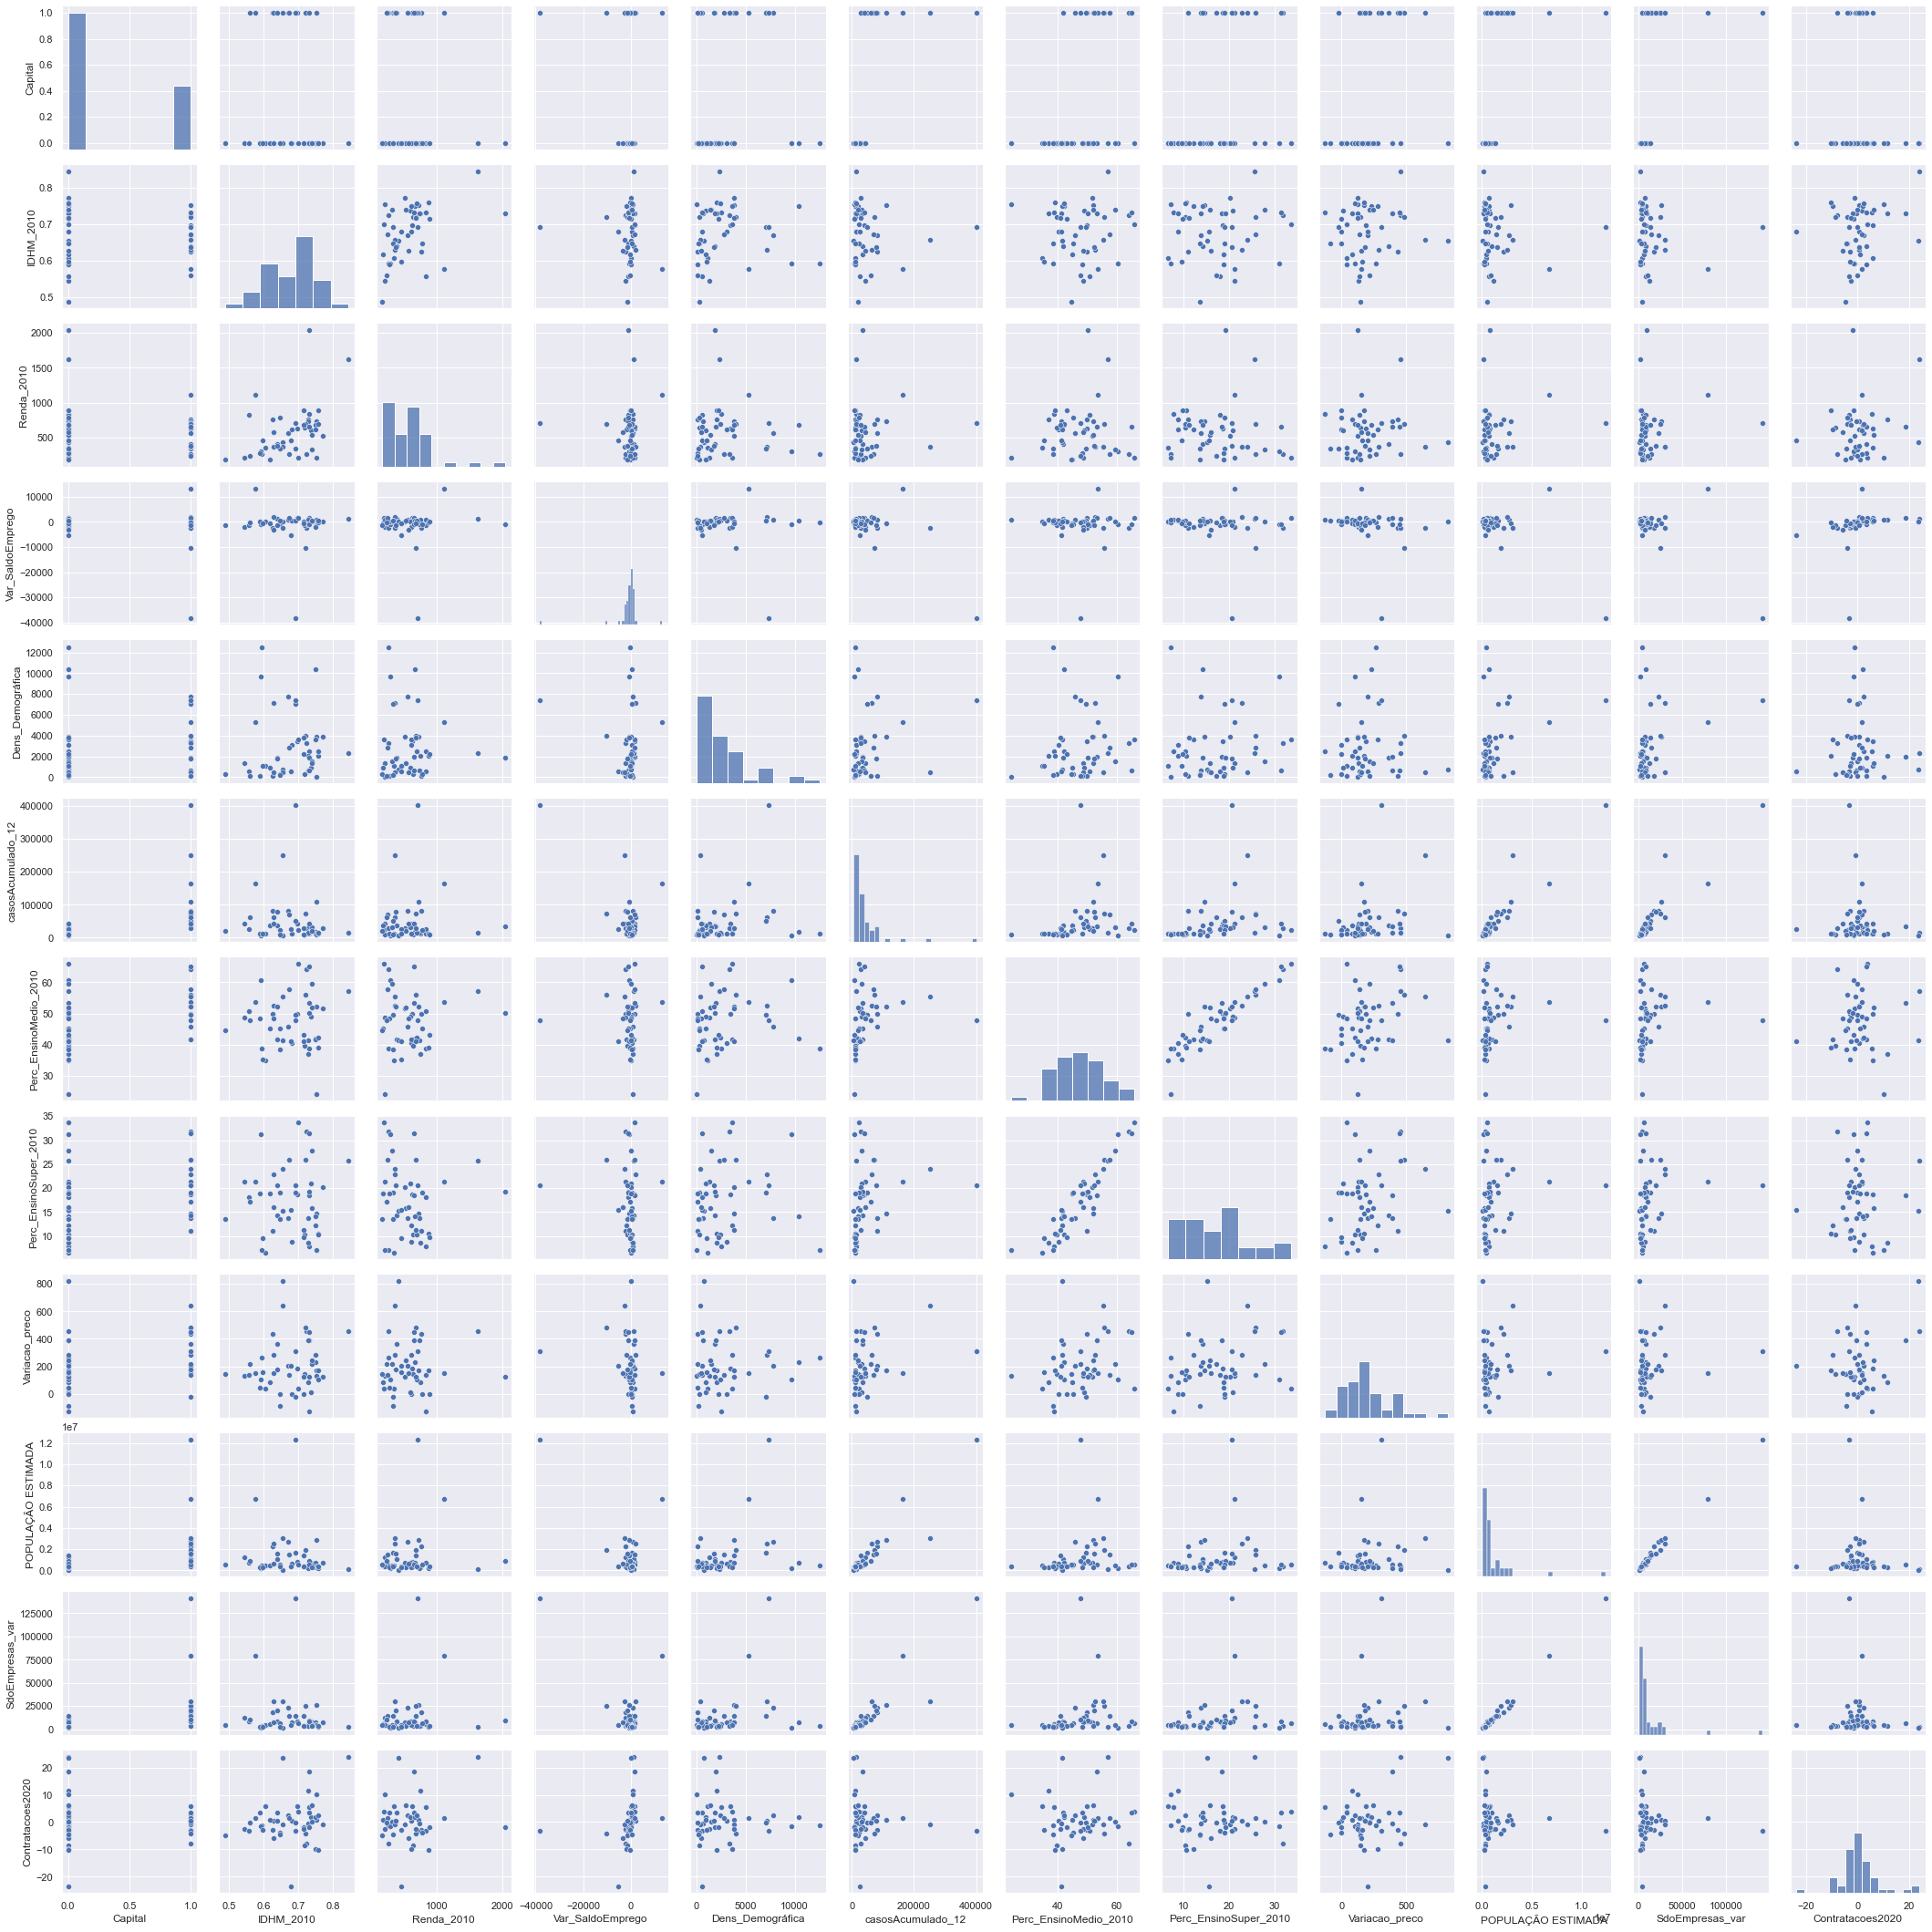

In [56]:
sns.pairplot(df_var.iloc[:,3:])

plt.show()

In [7]:
df = df_dez

### Carregas Municpios Espacial

In [57]:
municipios = gpd.read_file('bases-gdrive/Shapefile/Munic_brasil/munic_brasil.shp', index_col = 0)

municipios.head()

ID      AREA  GEOCODIGO                  NOME              NOMECAPS  UF  \
0   2  76680.43    1300201      Atalaia do Norte      ATALAIA DO NORTE  AM   
1   1   5474.51    1200336           Mâncio Lima           MANCIO LIMA  AC   
2  12   8832.70    1300607     Benjamin Constant     BENJAMIN CONSTANT  AM   
3  23   3236.87    1304062             Tabatinga             TABATINGA  AM   
4  24  12363.85    1303700  Santo Antônio do Içá  SANTO ANTONIO DO ICA  AM   

   CODUF REGIAO           MESORREGIA       MICRORREGI    RM  POP2004  \
0     13  Norte  SUDOESTE AMAZONENSE    ALTO SOLIMOES  None    11023   
1     12  Norte        VALE DO JURUA  CRUZEIRO DO SUL  None    11883   
2     13  Norte  SUDOESTE AMAZONENSE    ALTO SOLIMOES  None    25542   
3     13  Norte  SUDOESTE AMAZONENSE    ALTO SOLIMOES  None    42652   
4     13  Norte  SUDOESTE AMAZONENSE    ALTO SOLIMOES  None    33421   

   DENSDEMO                                           geometry  
0      0.14  POLYGON ((-73.80098 -7.11146, -73.79617 -7.102...  
1      2.17  POLYGON ((-73.80098 -7.11146, -73.73762 -7.134...  
2      2.89  POLYGON ((-70.13532 -4.28746, -70.12815 -4.293...  
3     13.18  POLYGON ((-69.95428 -4.26597, -69.95329 -4.253...  
4      2.70  POLYGON ((-69.83709 -3.68623, -69.82498 -3.620...

In [ ]:
estados = gpd.read_file('BR_UF_2020/BR_UF_2020.shp')

### Juntar Dados

In [9]:
esp_df = pd.merge(
    left = municipios,
    right = df,
    left_on = 'GEOCODIGO',
    right_index = True,
    how = 'right'
)

print(esp_df.shape)
esp_df.head()

(50, 29)


ID      AREA  GEOCODIGO         NOME     NOMECAPS UF_x  CODUF  \
949   127  11455.38    1302603       Manaus       MANAUS   AM     13   
121  5792    214.06    2507507  João Pessoa  JOAO PESSOA   PB     25   
84   5052    320.12    2304400    Fortaleza    FORTALEZA   CE     23   
621  5883    319.86    2927408     Salvador     SALVADOR   BA     29   
146  5581    516.46    2704302       Maceió       MACEIO   AL     27   

     REGIAO_x                  MESORREGIA   MICRORREGI  ... Renda_2010  \
949     Norte           CENTRO AMAZONENSE       MANAUS  ...     762.54   
121  Nordeste              MATA PARAIBANA  JOAO PESSOA  ...     627.59   
84   Nordeste  METROPOLITANA DE FORTALEZA    FORTALEZA  ...     562.53   
621  Nordeste   METROPOLITANA DE SALVADOR     SALVADOR  ...     727.33   
146  Nordeste              LESTE ALAGOANO       MACEIO  ...     401.42   

     SaldoEmprego_12  Dens_Demográfica casosAcumulado_12  \
949          -1451.0            158.06             82218   
121           1553.0           3421.30             41879   
84            1804.0           7786.52             81893   
621            523.0           3859.35            109906   
146            840.0           1854.12             36320   

    Perc_EnsinoMedio_2010 Perc_EnsinoSuper_2010 Preco_dez_2020  \
949                 49.86                 10.97    5046.799519   
121                 49.91                 18.61    4515.431694   
84                  45.93                 13.73    5947.932900   
621                 52.28                 14.59    5210.399506   
146                 41.83                 14.24    5194.891963   

     POPULAÇÃO ESTIMADA  SdoEmpresas_12  Contratacoes2020  
949             2219580         23234.0         -2.970542  
121              817511         11219.0          5.858631  
84              2686612         29292.0          2.347699  
621             2886698         33003.0          0.678999  
146             1025360         10293.0          3.382282  

[5 rows x 29 columns]

In [ ]:
esp_df.drop(['MESORREGIA', 'MESORREGIA', 'NOME'], axis = 1).to_file('Shapefiles/Municipio-Jan/')

In [101]:
df.head()

REGIAO  UF MUNICIPIO_DESCRICAO  Capital  IDHM_2010  Renda_2010  \
949     Norte  AM              Manaus        1      0.625      762.54   
121  Nordeste  PB         João Pessoa        1      0.697      627.59   
84   Nordeste  CE           Fortaleza        1      0.670      562.53   
621  Nordeste  BA            Salvador        1      0.753      727.33   
146  Nordeste  AL              Maceió        1      0.640      401.42   

     SaldoEmprego_01  Dens_Demográfica  Perc_EnsinoMedio_2010  \
949            878.0            158.06                  49.86   
121             41.0           3421.30                  49.91   
84             948.0           7786.52                  45.93   
621           1113.0           3859.35                  52.28   
146           -427.0           1854.12                  41.83   

     Perc_EnsinoSuper_2010  Preco_jan_2020  POPULAÇÃO ESTIMADA  \
949                  10.97     4611.637209             2219580   
121                  18.61     4329.077250              817511   
84                   13.73     5744.260562             2686612   
621                  14.59     5037.085869             2886698   
146                  14.24     4831.409966             1025360   

     SdoEmpresas_01  Contratacoes2020  POP2004  GEOCODIGO  
949          4904.0         -2.970542  1592555    1302603  
121          2702.0          5.858631   649410    2507507  
84           6393.0          2.347699  2332657    2304400  
621          6872.0          0.678999  2631831    2927408  
146          2205.0          3.382282   884320    2704302

### Selecionar dados para modelos

In [73]:
target = 'Preco_dez_2020'

x = df.iloc[:,3:].drop([target], axis = 1)

labels = x.columns

y = df[target]

x_y = pd.merge(x, y, left_index=True, right_index=True)

x.head()

Capital  IDHM_2010  Renda_2010  SaldoEmprego_12  \
MUNICIPIO_IBGE                                                    
1302603               1      0.625      762.54          -1451.0   
2507507               1      0.697      627.59           1553.0   
2304400               1      0.670      562.53           1804.0   
2927408               1      0.753      727.33            523.0   
2704302               1      0.640      401.42            840.0   

                Dens_Demográfica  casosAcumulado_12  Perc_EnsinoMedio_2010  \
MUNICIPIO_IBGE                                                               
1302603                   158.06              82218                  49.86   
2507507                  3421.30              41879                  49.91   
2304400                  7786.52              81893                  45.93   
2927408                  3859.35             109906                  52.28   
2704302                  1854.12              36320                  41.83   

                Perc_EnsinoSuper_2010  POPULAÇÃO ESTIMADA  SdoEmpresas_12  \
MUNICIPIO_IBGE                                                              
1302603                         10.97             2219580         23234.0   
2507507                         18.61              817511         11219.0   
2304400                         13.73             2686612         29292.0   
2927408                         14.59             2886698         33003.0   
2704302                         14.24             1025360         10293.0   

                Contratacoes2020  
MUNICIPIO_IBGE                    
1302603                -2.970542  
2507507                 5.858631  
2304400                 2.347699  
2927408                 0.678999  
2704302                 3.382282

### Correlações

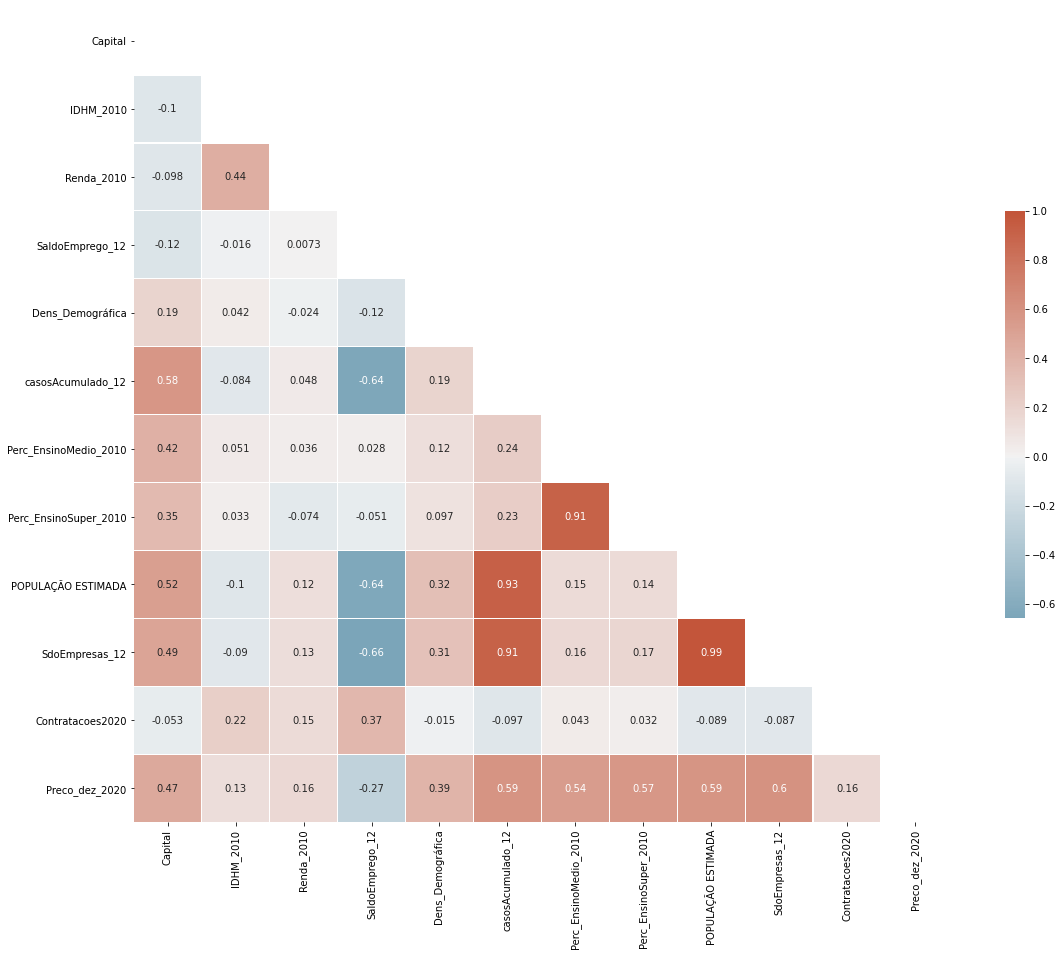

In [12]:
scripts.corr(x_y, figsize = (20,15))

### PPS index

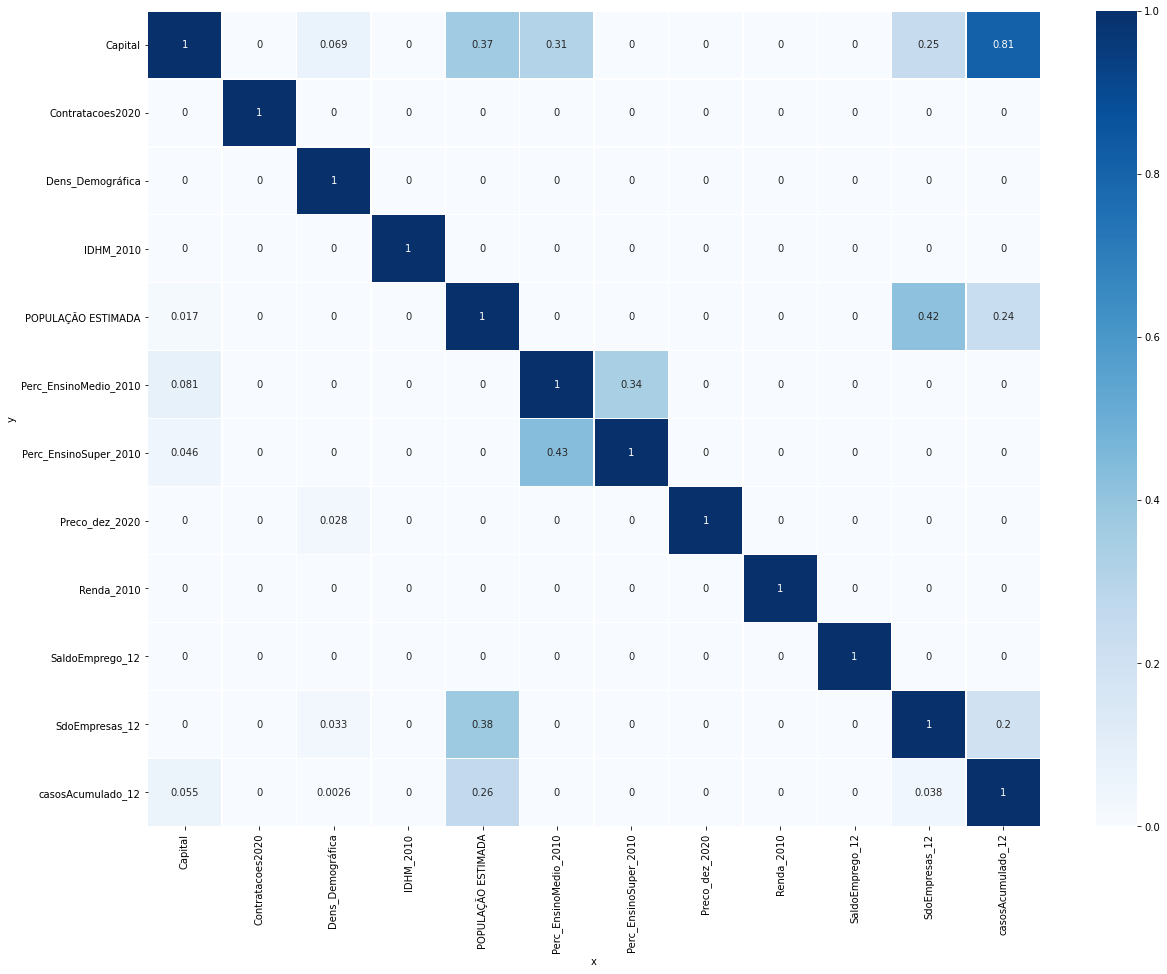

In [13]:
plt.figure(figsize=(20, 15))

matrix_df = pps.matrix(x_y)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

### Remoção de Variáveis com alta correlação

In [77]:
x = x[variables_sel]

labels = x.columns

x_y = pd.merge(x, y, left_index=True, right_index=True)


x.head()

Renda_2010  Dens_Demográfica  casosAcumulado_12  \
MUNICIPIO_IBGE                                                    
1302603             762.54            158.06              82218   
2507507             627.59           3421.30              41879   
2304400             562.53           7786.52              81893   
2927408             727.33           3859.35             109906   
2704302             401.42           1854.12              36320   

                Perc_EnsinoSuper_2010  Contratacoes2020  
MUNICIPIO_IBGE                                           
1302603                         10.97         -2.970542  
2507507                         18.61          5.858631  
2304400                         13.73          2.347699  
2927408                         14.59          0.678999  
2704302                         14.24          3.382282

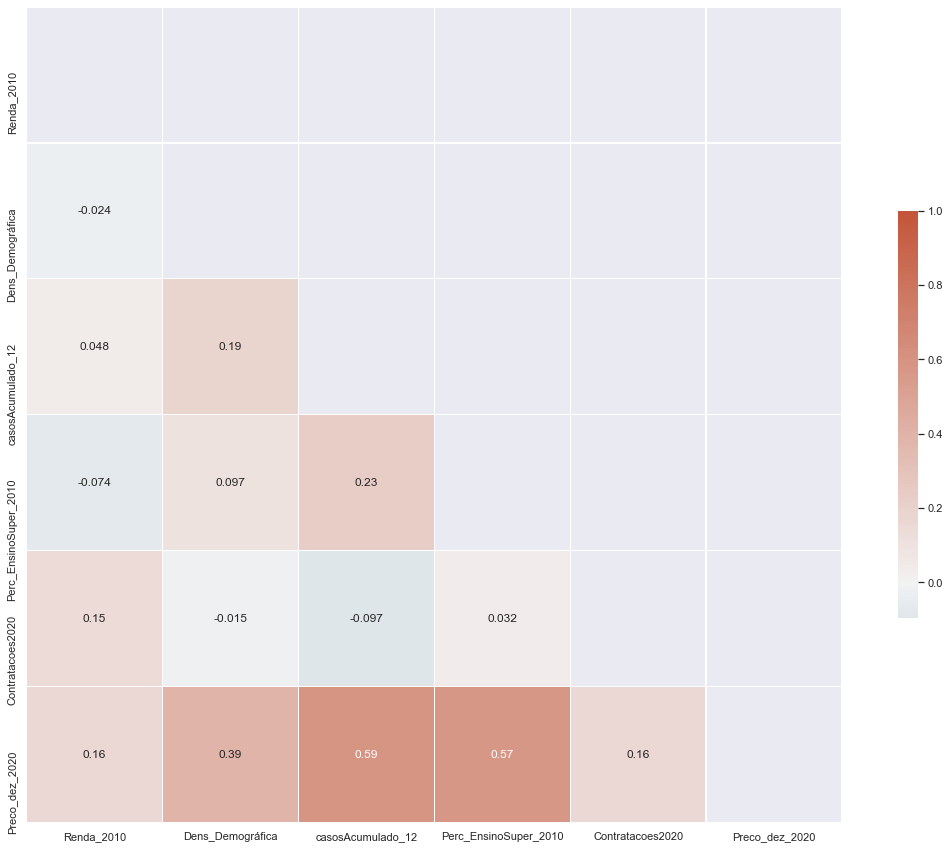

In [78]:
scripts.corr(x_y, figsize = (20,15))

#### VIF

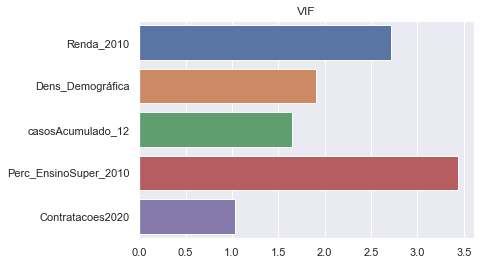

In [79]:
scripts.plot_vif(x)

#### Skewness e Kurtosis

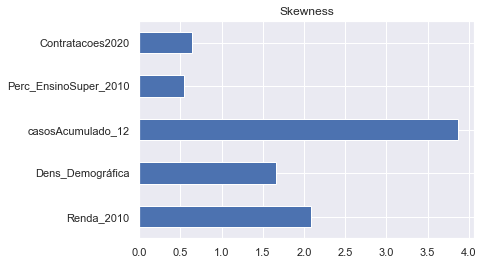

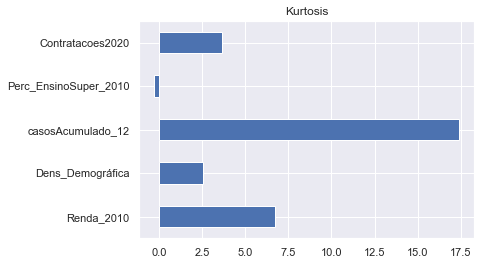

In [80]:
scripts.plot_skew_kurtosis(x)

### Realizar Normalização

In [84]:
x_norm = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index = x.index)

x_y_norm = pd.DataFrame(StandardScaler().fit_transform(x_y), columns = x_y.columns, index = x_y.index)

### Regressão Linear

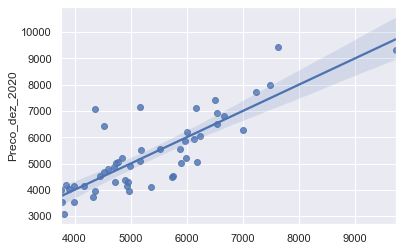

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Preco_dez_2020   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.78
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           5.96e-10
Time:                        22:32:58   Log-Likelihood:                -406.20
No. Observations:                  50   AIC:                             824.4
Df Residuals:                      44   BIC:                             835.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5373.3959    123.108     43.648      0.000    5125.287    5621.505
Renda_2010              220.7968    125.361      1.761      0.085     -31.851     473.445
Dens_Demográfica        391.6402    125.734      3.115      0.003     138.241     645.040
casosAcumulado_12       644.4744    129.925      4.960      0.000     382.628     906.321
Perc_EnsinoSuper_2010   647.1281    127.622      5.071      0.000     389.922     904.334
Contratacoes2020        250.7868    125.479      1.999      0.052      -2.099     503.673
==============================================================================
Omnibus:                       15.054   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.700
Skew:                           1.135   Prob(JB):                     0.000143
Kurtosis:                       4.829   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
lm = sm.OLS(endog = y, exog = add_constant(x_norm))

r = lm.fit()

sns.regplot(x = r.predict(add_constant(x_norm)), y = y)

plt.show()

r.summary()

#### Cross Validation

Results
MSE: 882946.312
RMSE: 939.652
MAE: 674.583
R2: 0.577


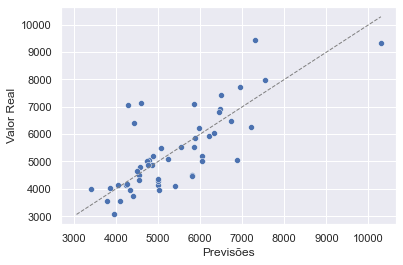

In [86]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, LinearRegression(), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

### PCA

In [87]:
pca = PCA(n_components = 2)

pca_coord = pca.fit_transform(x_y_norm)

### KMeans

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

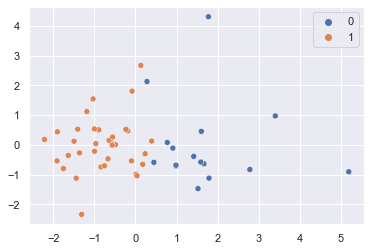

In [88]:
kmeans = KMeans(n_clusters = 2).fit_transform(x_y_norm)

sns.scatterplot(pca_coord[:,0], pca_coord[:,1], hue = kmeans.argmax(axis = 1), )

In [89]:
pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO, 'Cluster': kmeans.argmax(axis = 1)}).sort_values(by = 'Cluster')

Cidade  Cluster
MUNICIPIO_IBGE                                      
3534401                              Osasco        0
3548807                  São Caetano do Sul        0
4205407                       Florianópolis        0
3304557         Rio de Janeiro (território)        0
3550308              São Paulo (território)        0
4202008                  Balneário Camboriú        0
3548500                              Santos        0
4208302                             Itapema        0
3303302                             Niterói        0
3205309                             Vitória        0
4106902                            Curitiba        0
4314902                        Porto Alegre        0
3106200                      Belo Horizonte        0
2304400                           Fortaleza        0
2611606                              Recife        0
5300108                            Brasília        0
4318705                        São Leopoldo        1
4314407                             Pelotas        1
4216602                            São José        1
4113700                            Londrina        1
4202404                            Blumenau        1
4305108                       Caxias do Sul        1
3551009                         São Vicente        1
3518800                           Guarulhos        1
4316907                         Santa Maria        1
4209102                           Joinville        1
4304606                              Canoas        1
4313409                       Novo Hamburgo        1
1302603                              Manaus        1
3541000                        Praia Grande        1
2507507                         João Pessoa        1
2927408                            Salvador        1
2704302                              Maceió        1
2607901             Jaboatão dos Guararapes        1
3118601                            Contagem        1
3106705                               Betim        1
3205200                          Vila Velha        1
3509502                            Campinas        1
3548708               São Bernardo do Campo        1
3513801                             Diadema        1
3518701                             Guarujá        1
4125506                São José dos Pinhais        1
3547809                         Santo André        1
3549904                 São José dos Campos        1
4208203                              Itajaí        1
3549805               São José do Rio Preto        1
5002704                        Campo Grande        1
3505708                             Barueri        1
3543402                      Ribeirão Preto        1
5208707                             Goiânia        1

##### Outlier

In [90]:
df[pca_coord[:,0] > 5]

REGIAO  UF     MUNICIPIO_DESCRICAO  Capital  IDHM_2010  \
MUNICIPIO_IBGE                                                            
3550308         Sudeste  SP  São Paulo (território)        1      0.692   

                Renda_2010  SaldoEmprego_12  Dens_Demográfica  \
MUNICIPIO_IBGE                                                  
3550308             710.04         -16103.0           7387.69   

                casosAcumulado_12  Perc_EnsinoMedio_2010  \
MUNICIPIO_IBGE                                             
3550308                    401718                  47.88   

                Perc_EnsinoSuper_2010  Preco_dez_2020  POPULAÇÃO ESTIMADA  \
MUNICIPIO_IBGE                                                              
3550308                         20.63     9329.249053            12325232   

                SdoEmpresas_12  Contratacoes2020  
MUNICIPIO_IBGE                                    
3550308               185148.0         -3.284015

Removendo Outliers

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


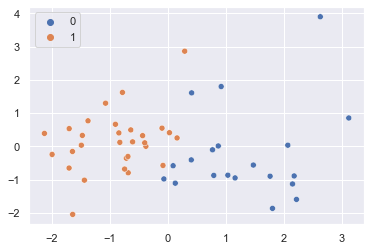

Cidade  Cluster
MUNICIPIO_IBGE                                      
3548807                  São Caetano do Sul        0
4106902                            Curitiba        0
3505708                             Barueri        0
4202008                  Balneário Camboriú        0
3534401                              Osasco        0
3304557         Rio de Janeiro (território)        0
3547809                         Santo André        0
4208302                             Itapema        0
3548500                              Santos        0
3513801                             Diadema        0
3205309                             Vitória        0
3509502                            Campinas        0
4205407                       Florianópolis        0
3205200                          Vila Velha        0
2611606                              Recife        0
4314902                        Porto Alegre        0
3106200                      Belo Horizonte        0
2304400                           Fortaleza        0
3303302                             Niterói        0
5300108                            Brasília        0
4216602                            São José        1
4113700                            Londrina        1
4314407                             Pelotas        1
4313409                       Novo Hamburgo        1
4305108                       Caxias do Sul        1
3551009                         São Vicente        1
4316907                         Santa Maria        1
3518800                           Guarulhos        1
4209102                           Joinville        1
4304606                              Canoas        1
4202404                            Blumenau        1
1302603                              Manaus        1
3548708               São Bernardo do Campo        1
2507507                         João Pessoa        1
2927408                            Salvador        1
2704302                              Maceió        1
2607901             Jaboatão dos Guararapes        1
3118601                            Contagem        1
3106705                               Betim        1
4318705                        São Leopoldo        1
3543402                      Ribeirão Preto        1
4125506                São José dos Pinhais        1
3549904                 São José dos Campos        1
4208203                              Itajaí        1
3549805               São José do Rio Preto        1
5002704                        Campo Grande        1
3541000                        Praia Grande        1
3518701                             Guarujá        1
5208707                             Goiânia        1

In [91]:
slicer = pca_coord[:,0] < 5

pca = PCA(n_components = 2)

pca_coord_new = pca.fit_transform(x_y_norm.values[slicer])

kmeans_new = KMeans(n_clusters = 2).fit_transform(x_y_norm.values[slicer])

sns.scatterplot(pca_coord_new[:,0], pca_coord_new[:,1], hue = kmeans_new.argmax(axis = 1), )

plt.show()

pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO[slicer], 'Cluster': kmeans_new.argmax(axis = 1)}).sort_values(by = 'Cluster')

### Cluster Dendograma

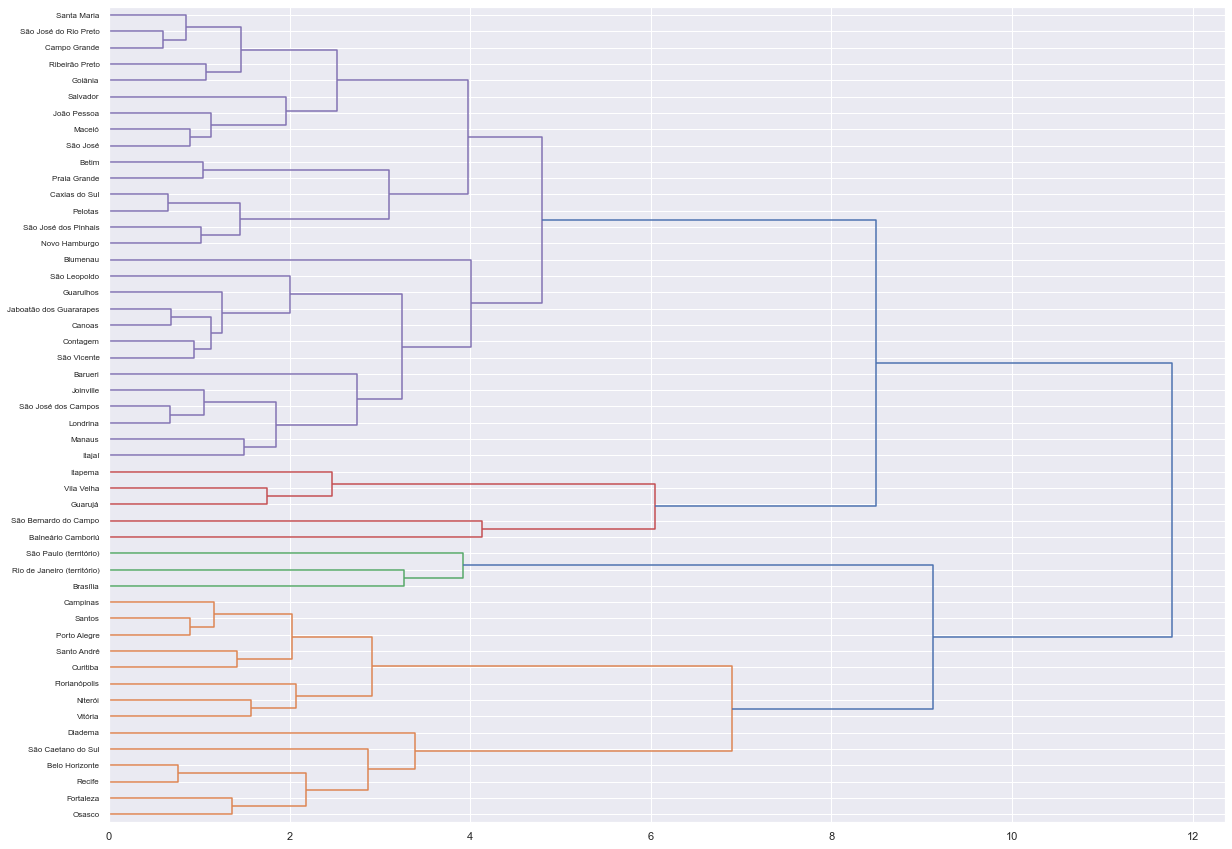

In [92]:
linked = linkage(x_y_norm.values, 'ward')

plt.figure(figsize=(20, 15))
dendrogram(
            linked,
            orientation='right',
            labels=df.MUNICIPIO_DESCRICAO.values,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

### Regressão Espacial

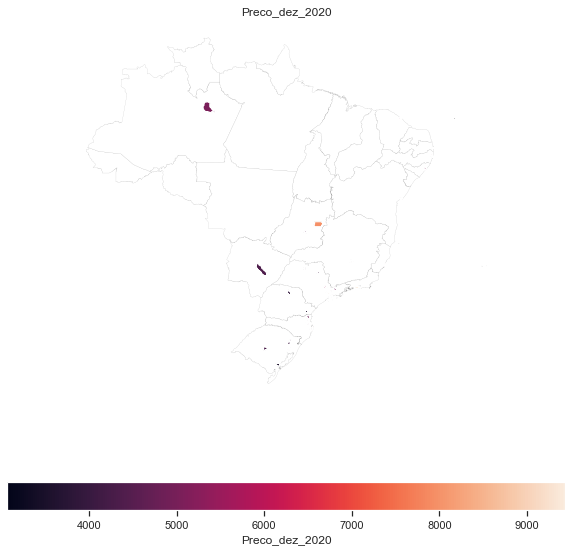

In [93]:
ax = estados.plot(figsize = (10,10),linewidth=.1, 
                     color = 'white', edgecolor = 'gray',
                 )

ax = esp_df.plot(
    column = target,
    ax = ax,
    legend = True,
    legend_kwds = {'label': target, 'orientation': "horizontal"},
)

ax.set_title(target)

ax.set_axis_off()

In [94]:
# w = libpysal.weights.Queen.from_dataframe(df, )
# w = libpysal.weights.Voronoi.from_dataframe(df.centroid, )

w = libpysal.weights.DistanceBand.from_dataframe(esp_df, 3)

w.transform = 'r'

('WARNING: ', 949, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 621, ' is an island (no neighbors)')
('WARNING: ', 1902, ' is an island (no neighbors)')


/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 4 islands with ids: 949, 84, 621, 1902.
  warnings.warn(message)


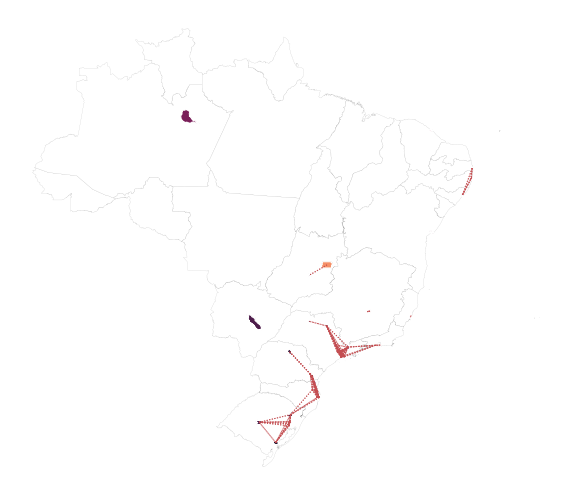

In [95]:
ax = estados.plot(figsize = (10,10),linewidth=.1, 
                     color = 'white', edgecolor = 'gray',
                 )

ax = esp_df.plot(column = target,ax = ax)

f, ax = w.plot(esp_df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''),
              )
ax.set_axis_off()

In [96]:
moran_I = {}
moran = {}
moran_local = {}

for i in x_y_norm.columns:
    
    moran[i] = esda.Moran(x_y_norm[i].values, w)
#     moran_local[i] = esda.moran.Moran_Local(x_y_norm[i].values, w)
    moran_I[i] = moran[i].I

In [97]:
(pd.Series(moran_I)
     .rename('Moran I')
     .sort_values(ascending = False)
     .to_frame()
)

Moran I
Dens_Demográfica       0.112315
casosAcumulado_12      0.030393
Perc_EnsinoSuper_2010  0.028926
Preco_dez_2020        -0.010012
Renda_2010            -0.038490
Contratacoes2020      -0.156145

Dens_Demográfica


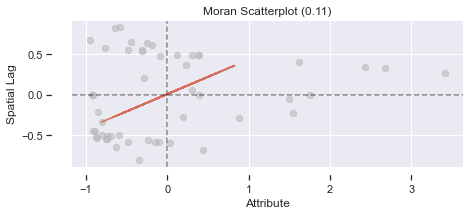

casosAcumulado_12


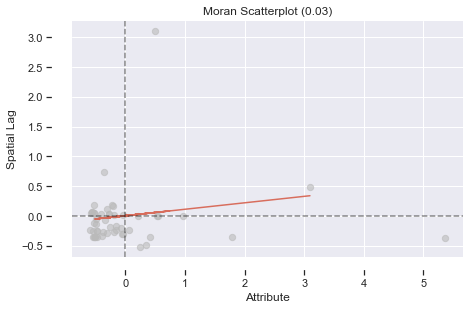

Perc_EnsinoSuper_2010


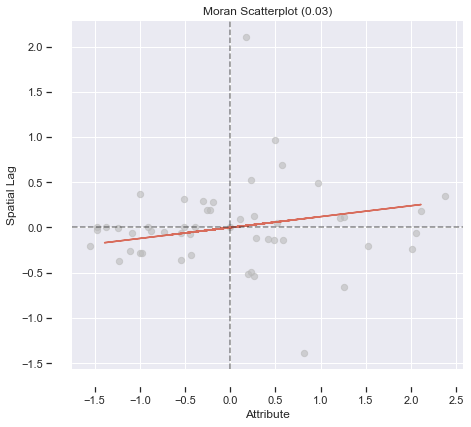

Preco_dez_2020


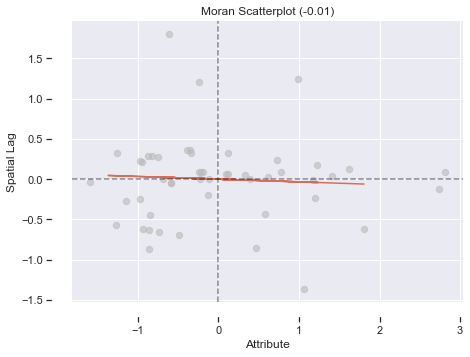

In [98]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])
    moran_scatterplot(moran[i[0]], aspect_equal=True)
    plt.show()

In [99]:
r = spreg.OLS(
        x = x_norm.values, name_x = list(labels),
        y = y.values, 
        w = w,
    )

print(r.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          50
Mean dependent var  :   5373.3959                Number of Variables   :           6
S.D. dependent var  :   1460.2584                Degrees of Freedom    :          44
R-squared           :      0.6809
Adjusted R-squared  :      0.6446
Sum squared residual:33342498.166                F-statistic           :     18.7766
Sigma-square        :  757784.049                Prob(F-statistic)     :   5.963e-10
S.E. of regression  :     870.508                Log likelihood        :    -406.205
Sigma-square ML     :  666849.963                Akaike info criterion :     824.410
S.E of regression ML:    816.6088                Schwarz criterion     :     835.882

-----------------------------------------------------------------------------

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       preco                Number of Observations:          50
Mean dependent var  :   5373.3959                Number of Variables   :           7
S.D. dependent var  :   1460.2584                Degrees of Freedom    :          43
Pseudo R-squared    :      0.6412
Spatial Pseudo R-squared:  0.6410

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    6182.1529516     953.5146278       6.4835429       0.0000000
          Renda_2010     241.1833733     127.2665472       1.8951042       0.0580786
    Dens_Demográfica     384.4931416     125.6646696       

<AxesSubplot:ylabel='Preco_dez_2020'>

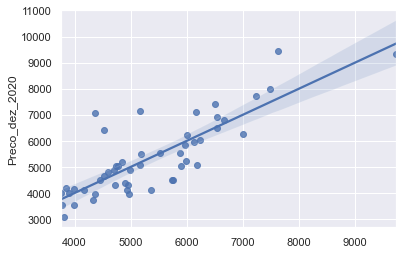

In [100]:
spatial_regression = spreg.GM_Lag(
        x = x_norm.values, name_x = list(labels),
        y = y.values, name_y = 'preco',
        w = w,
    
        
    )

print(
    spatial_regression.summary
)

sns.regplot(x = r.predy, y = y)

### Random Forests

In [101]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(y = y, X = x_norm)

RandomForestRegressor(n_estimators=200)

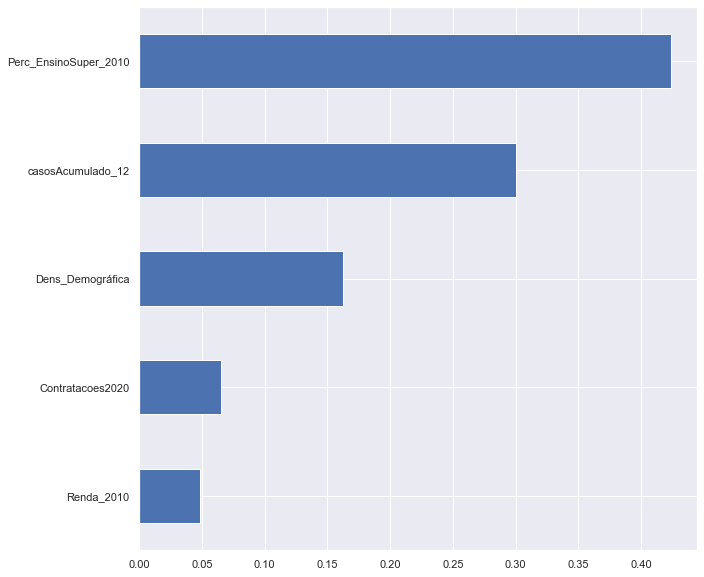

In [102]:
pd.Series(rf.feature_importances_, index = labels).sort_values().plot.barh(figsize = (10,10))

plt.show()

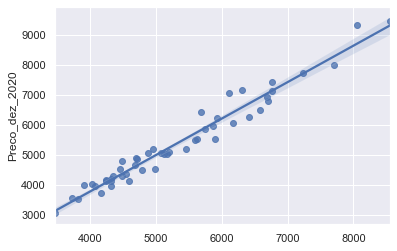

In [103]:
sns.regplot(x = rf.predict(x_norm), y = y)

plt.show()

Results
MSE: 1151798.679
RMSE: 1073.219
MAE: 767.325
R2: 0.449


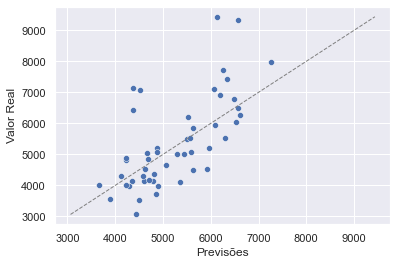

In [104]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, RandomForestRegressor(n_estimators = 50), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

#### Recursive Feature Eliminations

In [105]:
selector_rf = RFE(rf, n_features_to_select=.5, step=1)

selector_rf = selector_rf.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_rf.ranking_, index = labels).sort_values()

Best Features


casosAcumulado_12        1
Perc_EnsinoSuper_2010    1
Dens_Demográfica         2
Contratacoes2020         3
Renda_2010               4
dtype: int64

### Linear Support Vector Regression

In [106]:
svr = SVR(kernel = 'linear')

svr = svr.fit(y = y, X = x_norm)

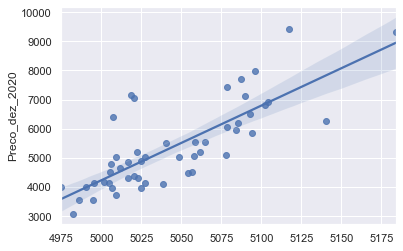

In [107]:
sns.regplot(x = svr.predict(x_norm), y = y)

plt.show()

Results
MSE: 2157618.997
RMSE: 1468.884
MAE: 1120.724
R2: -0.032


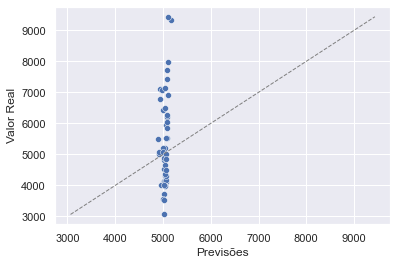

In [108]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, svr, folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

In [109]:
selector_svr = RFE(SVR(kernel='linear'), n_features_to_select=.5, step=1)

selector_svr = selector_svr.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_svr.ranking_, index = labels).sort_values()

Best Features


Dens_Demográfica         1
Perc_EnsinoSuper_2010    1
casosAcumulado_12        2
Renda_2010               3
Contratacoes2020         4
dtype: int64

In [110]:
pd.DataFrame(
    {
    'RF Feature Importance': np.argsort(-rf.feature_importances_),
    'RF RFE': selector_rf.ranking_,
    'SVR RFE': selector_svr.ranking_
},
    index = labels
)

RF Feature Importance  RF RFE  SVR RFE
Renda_2010                                 3       4        3
Dens_Demográfica                           2       2        1
casosAcumulado_12                          1       1        2
Perc_EnsinoSuper_2010                      4       1        1
Contratacoes2020                           0       3        4